In [ ]:
!sudo -H pip install --upgrade 'git+https://github.com/hackwa/Pynq@master#egg=fir'

In [46]:
# Hardware Implementation of a Low Pass FIR Filter

from fir import fir
import numpy as np
f = fir()


T = 5.0         # seconds
fs = 30.0
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data
samples = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Initialize hardware and download bitstream
f.initHw()

# Calculation here
f.getResponse(list(samples))
print(f.response)

[396, 290, -195, 437, 298, -173, -326, -754, -1676, -2546, -2530, -3188, -3682, -3048, -2776, -3029, -2314, -1784, -1479, -905, 221, 983, 1434, 2938, 3451, 3332, 3643, 3393, 2565, 1711, 1601, 562, -262, -419, -1665, -2767, -3375, -3870, -2988, -482, 5298, 14314, 25984, 41477, 58378, 74357, 88979, 99002, 102715, 99760, 90964, 75998, 56682, 36149, 13849, -8859, -30775, -52072, -72281, -89670, -101725, -108119, -106418, -94908, -75616, -50559, -21067, 8491, 35179, 57537, 75002, 86754, 93469, 97103, 95753, 89422, 78584, 61879, 39607, 13604, -13218, -39943, -62991, -80147, -92247, -98874, -99848, -96116, -89156, -77696, -60195, -37896, -11765, 18689, 49469, 75570, 96987, 110038, 112144, 105253, 92644, 73833, 52274, 31694, 10738, -10738, -31694, -52274, -73833, -92644, -105253, -112144, -110038, -96987, -75570, -49469, -18689, 11765, 37896, 60195, 77696, 89156, 96116, 99848, 98874, 92247, 80543, 63677, 40434, 13354, -13354, -40434, -63677, -80543, -92247, -98874, -99848, -96116, -89156, -776

<IPython.core.display.Javascript object>


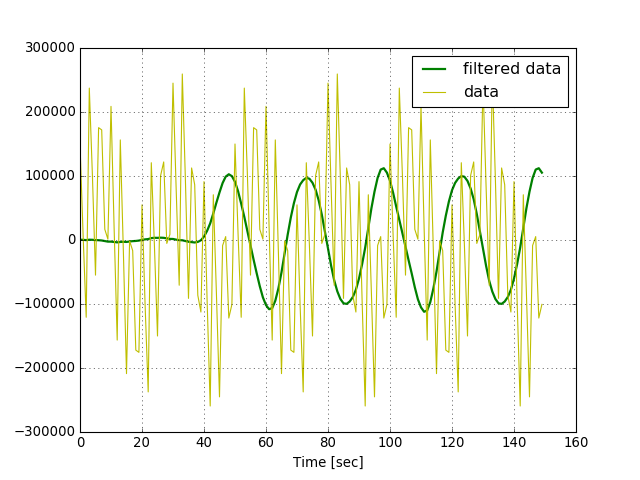

In [47]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.subplot(1, 1, 1)
plt.xlabel('Time [sec]')
plt.grid()
plt.plot(f.response,'g-',linewidth=2,label='filtered data')
plt.plot(samples* 100000,'y-',label='data')
plt.legend()

<IPython.core.display.Javascript object>


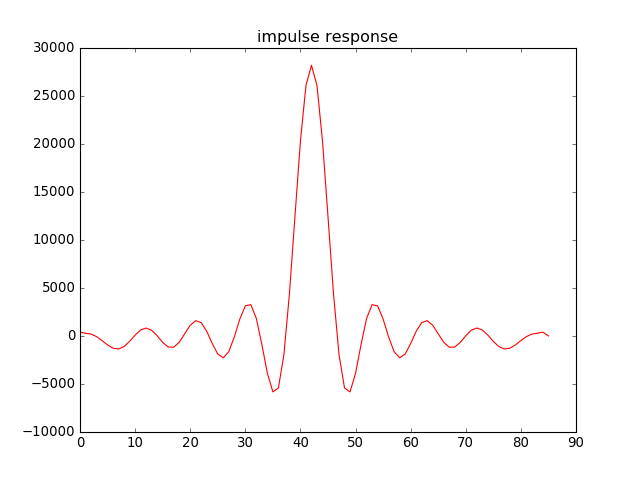

In [35]:
%matplotlib notebook
import matplotlib.pyplot as plt

plt.plot(f.impulseResponse(),'r')
plt.title('impulse response')

<IPython.core.display.Javascript object>


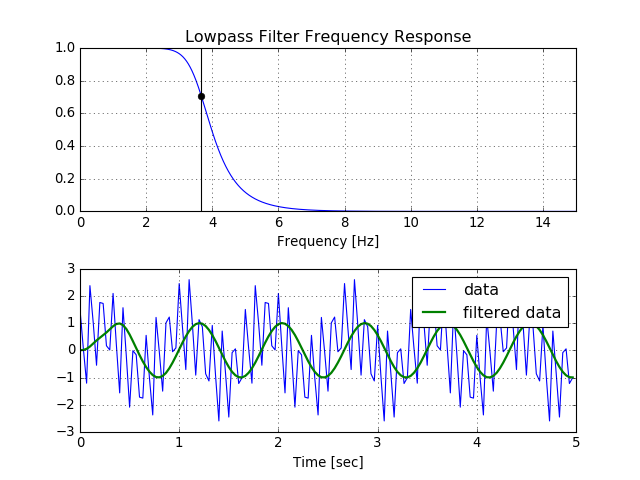

In [45]:
%matplotlib notebook

# Software Implementation of filter found at:
# http://stackoverflow.com/questions/25191620/creating-lowpass-filter-in-scipy-understanding-methods-and-units

import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Filter requirements.
order = 6
fs = 30.0       # sample rate, Hz
cutoff = 3.667  # desired cutoff frequency of the filter, Hz

# Get the filter coefficients so we can check its frequency response.
b, a = butter_lowpass(cutoff, fs, order)

# Plot the frequency response.
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Demonstrate the use of the filter.
# First make some data to be filtered.
T = 5.0         # seconds
n = int(T * fs) # total number of samples
t = np.linspace(0, T, n, endpoint=False)
# "Noisy" data.  We want to recover the 1.2 Hz signal from this.
data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filter the data, and plot both the original and filtered signals.
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
# plt.show()

In [ ]:
# Benchmarks:
# 
# Total samples processed = 150
#
# Hardware implementation
#
# real	0m1.661s
# user	0m1.330s
# sys	0m0.230s
#
# Software implementaion
#
# real	0m5.281s
# user	0m4.950s
# sys	0m0.260s
#
#
#
#samples = [i for i in range(250)]
#x = np.linspace(0,60,600)
#samples =   np.sin(300* x) + 2 * np.sin(x) + np.sin(x/2) + 2* np.sin(x/3)+ np.sin(x/4) + np.sin(x/5) +  np.sin(x/7)